In [1]:
# import dependencies
from IPython.display import display, Javascript, Image
#from google.colab.output import eval_js
from js2py import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time
import glob
import matplotlib.pyplot as plt
import math

In [2]:
path = 'C:/Users/SYUKTA/Music/KPT Projek/Assign1/face/'
path2 = 'C:/Users/SYUKTA/Music/KPT Projek/Assign1/opencv/data/haarcascades_cuda/'

In [3]:
# initialize the Haar Cascade face detection model
face_cascade = cv2.CascadeClassifier(path2 + 'haarcascade_frontalface_default.xml')

In [4]:
face_cascade.empty()

False

In [5]:
cam = cv2.VideoCapture(0)
cv2.namedWindow("test")
img_counter = 0
while (img_counter<3):
    ret, frame = cam.read()
    if not ret:
        print("failed to grab frame")
        break
    cv2.imshow("test", frame)

    k = cv2.waitKey(1)
    if k%256 == 27:
        # ESC pressed
        print("Escape hit, closing...")
        break
    elif k%256 == 32:
        # SPACE pressed
        img = path+"photo_{}.png".format(img_counter)
        cv2.imwrite(img, frame)
        print("{} written!".format(img))
        img_counter += 1

cam.release()
cv2.destroyAllWindows()

C:/Users/SYUKTA/Music/KPT Projek/Assign1/face/photo_0.png written!
C:/Users/SYUKTA/Music/KPT Projek/Assign1/face/photo_1.png written!
C:/Users/SYUKTA/Music/KPT Projek/Assign1/face/photo_2.png written!


In [6]:
def plotImages(img):
    plt.imshow(img, cmap="gray")
    plt.axis('off')
    plt.style.use('seaborn')
    plt.show()

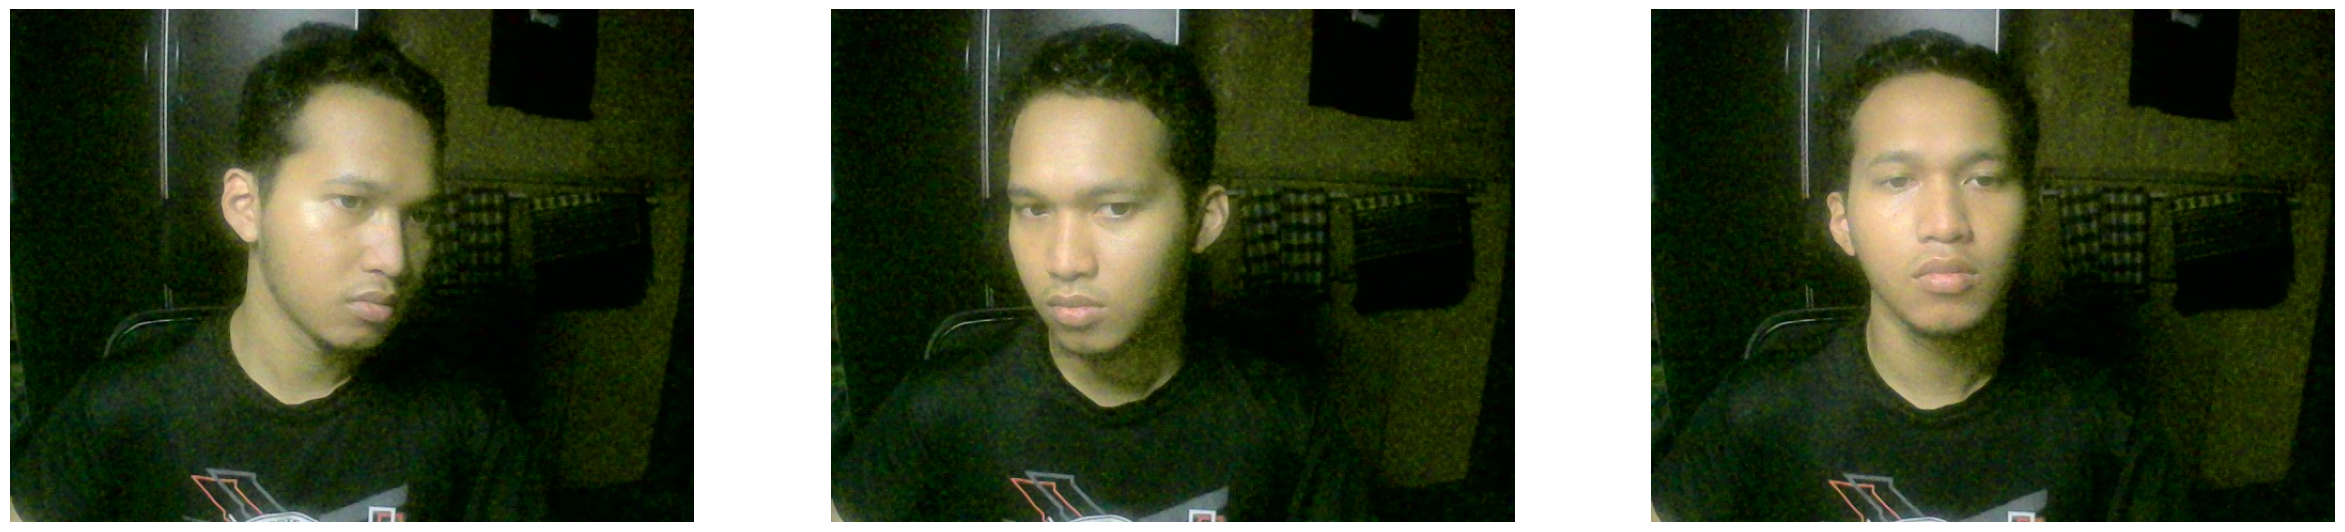

In [7]:
# Show the image which was just taken.
imagefiles = glob.glob(path+"*")
imagefiles.sort()
images = []
for filename in imagefiles:
    img = cv2.imread(filename)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    images.append(img)
num_images = len(images)

plt.figure(figsize=[30,10]) 
num_cols = 3
num_rows = math.ceil(num_images / num_cols)
for i in range(0, num_images):
    plt.subplot(num_rows, num_cols, i+1) 
    plt.axis('off')
    plt.imshow(images[i])

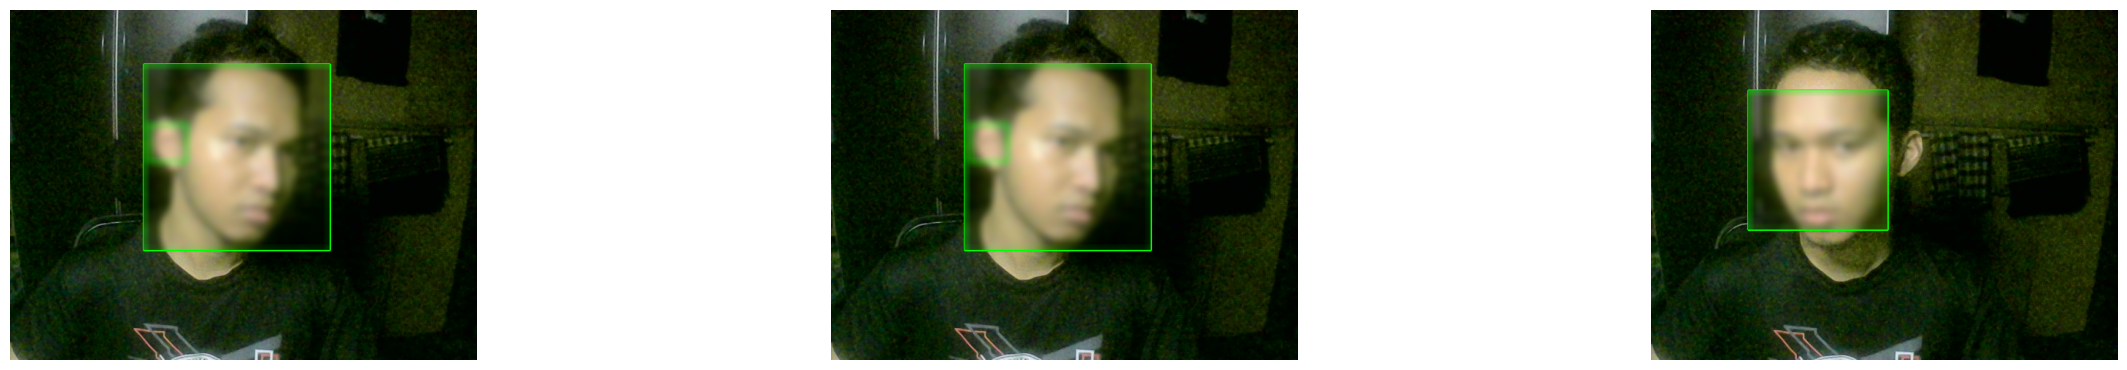

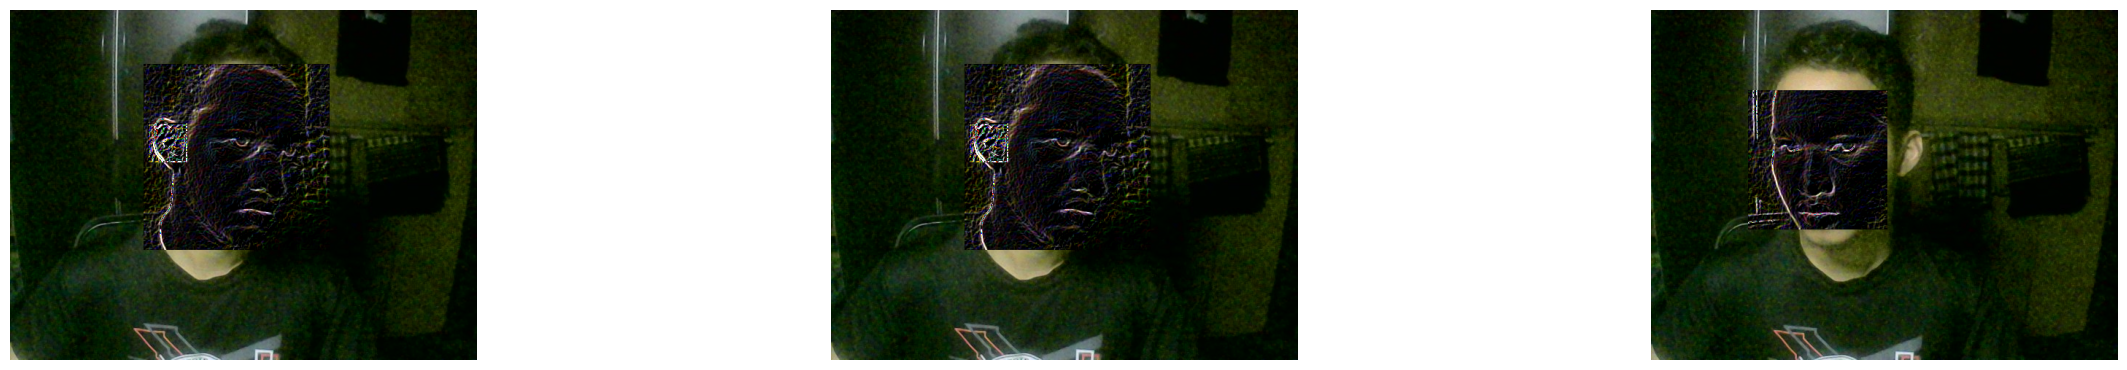

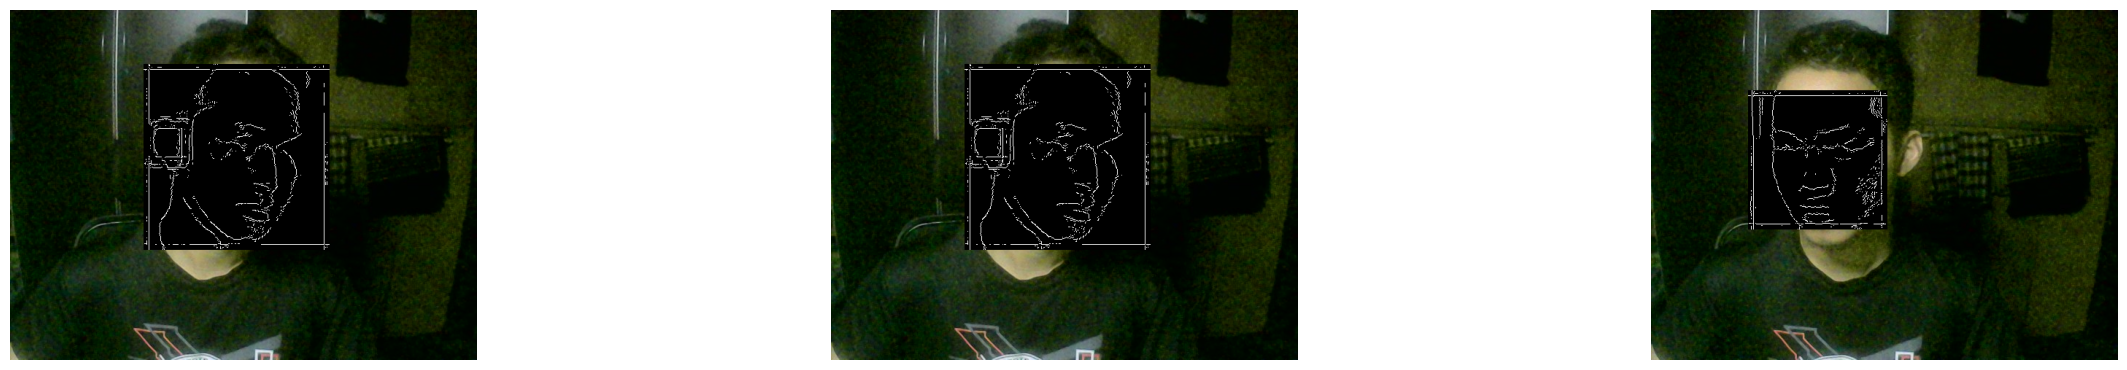

In [8]:
imgBlur = []
imgCanny = []
imgSobel = []

for img in images:
    image = img.copy()
    canny = image.copy()
    sobel = image.copy()
    face_data = face_cascade.detectMultiScale(image, 1.3, 5)

    for (x, y, w, h) in face_data:
        #draw rectangle
        detect = cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

        #apply blur
        blur = cv2.GaussianBlur(image[y:y+h, x:x+w], (15, 15), 5)
        image[y:y+h, x:x+w] = blur
        imgBlur.append(image)

        #apply sobel
        sobelx = cv2.Sobel(sobel[y:y+h, x:x+w], cv2.CV_8U,1,0,ksize=3)
        sobely = cv2.Sobel(sobel[y:y+h, x:x+w], cv2.CV_8U,0,1,ksize=3)
        imgsobel = sobelx + sobely
        sobel[y:y+h, x:x+w] = imgsobel
        imgSobel.append(sobel)

        #apply canny
        imgcanny = cv2.Canny(blur,35,35)
        imgcanny = imgcanny.reshape((imgcanny.shape[0], imgcanny.shape[1], 1))
        canny[y:y+h, x:x+w] = imgcanny
        imgCanny.append(canny)


#plot blur image
plt.figure(figsize=[30,10]) 
num_cols = 3
num_rows = math.ceil(len(imgBlur) / num_cols)
for i in range(0, num_images):
    plt.subplot(num_rows, num_cols, i+1) 
    plt.axis('off')
    plt.imshow(imgBlur[i])

#plot sobel
plt.figure(figsize=[30,10]) 
num_cols = 3
num_rows = math.ceil(len(imgBlur) / num_cols)
for i in range(0, num_images):
    plt.subplot(num_rows, num_cols, i+1) 
    plt.axis('off')
    plt.imshow(imgSobel[i])

#plot canny
plt.figure(figsize=[30,10]) 
num_cols = 3
num_rows = math.ceil(len(imgBlur) / num_cols)
for i in range(0, num_images):
    plt.subplot(num_rows, num_cols, i+1) 
    plt.axis('off')
    plt.imshow(imgCanny[i])